In [1]:
import os.path
import pandas as pd
import clb
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import typhon.plots
import seaborn as sns
import pickle
from pyclamster.positioning import plot_results2d, plot_results3d

plt.style.use('typhon')

In [2]:
BASE_DIR = '/home/tfinn/Data/Ceilometer'
ceilo_first = clb.csv.read(os.path.join(BASE_DIR, 'LEX', 'CL_first.txt'))
ceilo_second = clb.csv.read(os.path.join(BASE_DIR, 'LEX', 'CL.txt'))
ceilo_first['DATETIME'] = np.array([dt.datetime.strptime('-'.join([D, ceilo_first['TIME'][k]]), '%d.%m.%Y-%H:%M') for k, D in enumerate(ceilo_first['DATE'])])
ceilo_second['DATETIME'] = np.array([dt.datetime.strptime('-'.join([D, ceilo_second['TIME'][k]]), '%d.%m.%Y-%H:%M') for k, D in enumerate(ceilo_second['DATE'])])
ceilo = pd.DataFrame(ceilo_first).set_index('DATETIME')
ceilo.index = ceilo.index-dt.timedelta(hours=1)
ceilo_plt = ceilo.ix[:, ['CL_SCHA', 'CL_SCHB']]

In [3]:
cam = pd.read_json('/home/tfinn/Projects/pyclamster/data/heights_201609010900_4h_300_new.json')
#cam = pd.read_json('/home/tfinn/Desktop/heights_long_600.json')
cam.index = cam.index-dt.timedelta(hours=1, seconds=20*60)
cam[cam>8000] = np.NaN
cam_min = cam.mean(axis=1)

In [4]:
ceilo_cam = pd.DataFrame()
ceilo_cam = ceilo_plt
ceilo_cam.ix[:, 'cloud camera'] = cam_min.rolling(20, 5).mean()
ceilo_cam.dropna(inplace=True)
ceilo_cam.corr()

,CL_SCHA,CL_SCHB,cloud camera
CL_SCHA,1.000000,-0.109669,-0.049586
CL_SCHB,-0.109669,1.000000,0.435534
cloud camera,-0.049586,0.435534,1.000000


/home/tfinn/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


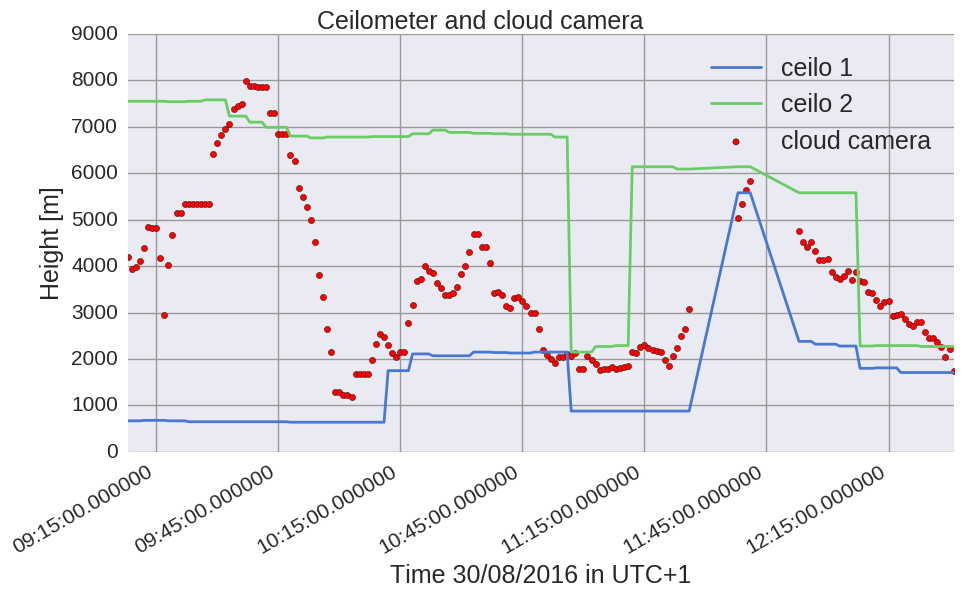

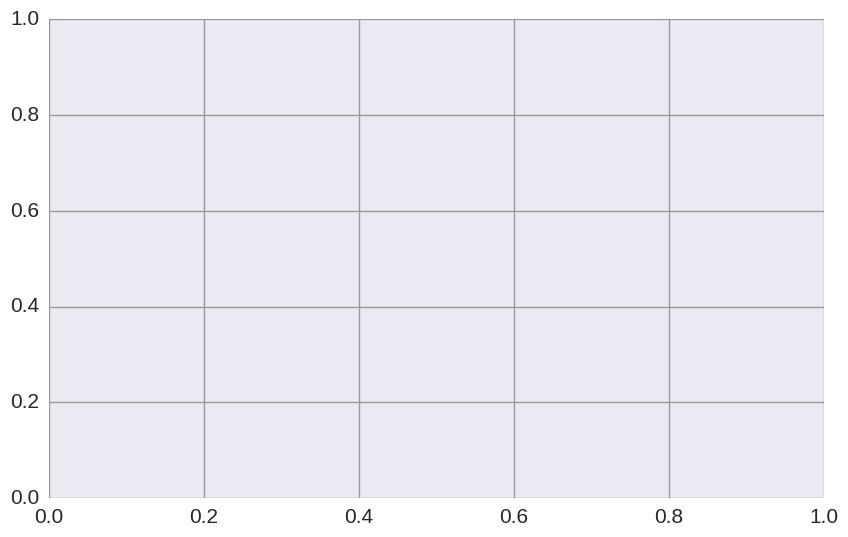

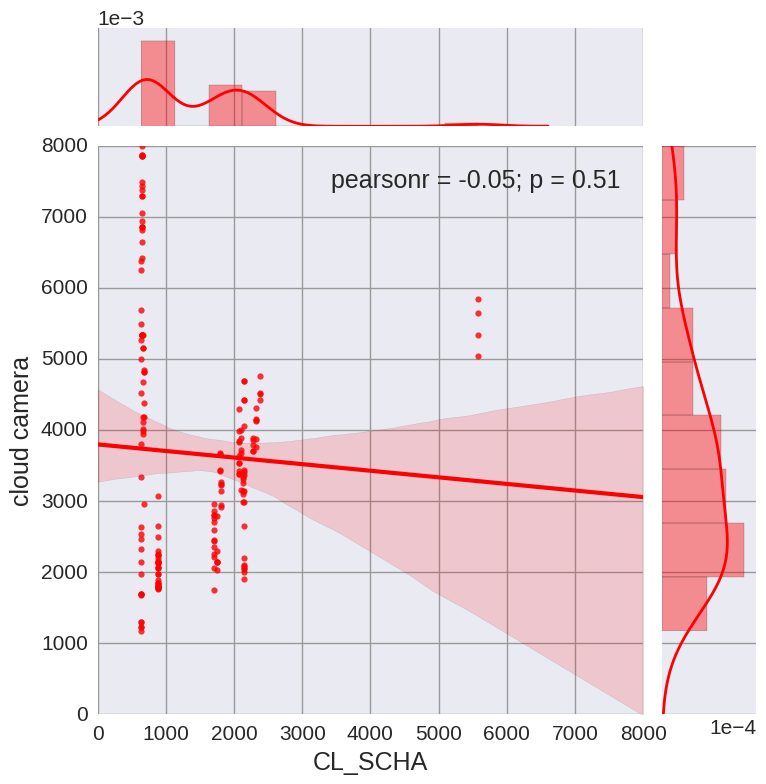

In [5]:
fig, ax = plt.subplots()
fig.suptitle('Ceilometer and cloud camera')
c = ceilo_cam['CL_SCHA'].plot(ax=ax, label='ceilo 1')
c = ceilo_cam['CL_SCHB'].plot(ax=ax, label='ceilo 2')
#for i in cam.columns:
#    s = ax.scatter(cam.index, cam[i], c='r')
s = ax.scatter(ceilo_cam.index, ceilo_cam['cloud camera'], c='r')
plt.legend()
ax.set_ylim(0,9000)
ax.set_xlabel('Time 30/08/2016 in UTC+1')
ax.set_ylabel('Height [m]')
plt.tight_layout()
#plt.savefig('/home/tfinn/Desktop/ceilo_30_.png')
fig, ax = plt.subplots()
g = sns.jointplot("CL_SCHA", "cloud camera", data=ceilo_cam, kind='reg',
                  xlim=(0, 8000), ylim=(0, 8000), color="r", size=8)
#plt.savefig('/home/tfinn/Desktop/scatter_30_.png')
plt.show()
plt.close('all')

In [6]:
xy = pickle.load(open('/home/tfinn/Projects/pyclamster/data/xy.pk', mode='rb'))

In [7]:
x=xy[sorted(xy.keys())[0]][0][1]
y=xy[sorted(xy.keys())[0]][0][0]

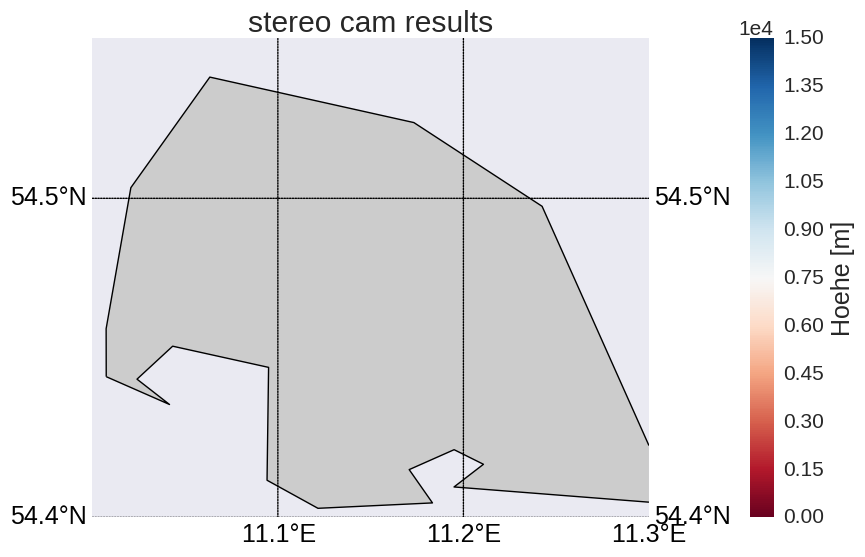

In [8]:
plot_results2d(x, y, z=cam.iloc[0,0])
plt.show()